In [1]:
import pandas as pd
import numpy as np
import statsmodels.graphics.tsaplots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller

%matplotlib inline

/Users/zoealdington/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


/Users/zoealdington/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


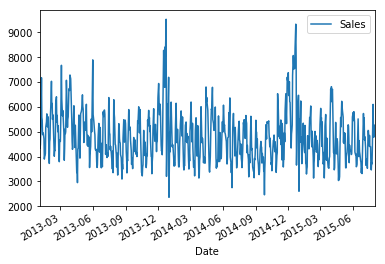

In [2]:
# Load the data and set the DateTime index
data = pd.read_csv('rossmann.csv', skipinitialspace=True)
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
# Filter to Store 1
store1_data = data[data.Store == 1]
# Filter to open days
store1_open_data = store1_data[store1_data.Open==1]
# Plot the sales over time
store1_open_data[['Sales']].plot()


In [3]:
print(store1_data.Sales.autocorr(lag=1))
print(store1_data.Sales.autocorr(lag=2))

-0.127325143391
-0.0347871557079


Here we observe autocorrelation at 40 lag values.  1 and 2 are what we saw before.  
This implies a small but limited impact based on the last few values.  An autoregressive model might be useful.

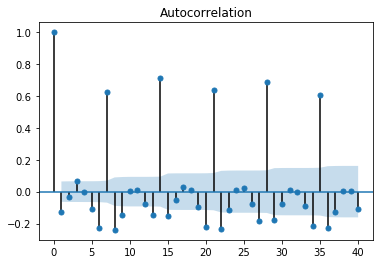

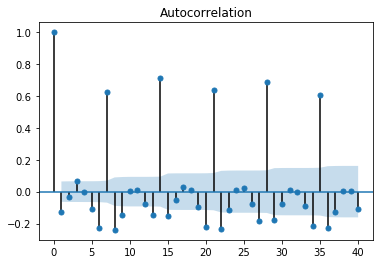

In [4]:
#plot_acf(store1_data.Sales.diff(periods=1)[1:],lags=40)
plot_acf(store1_data.Sales,lags=40)

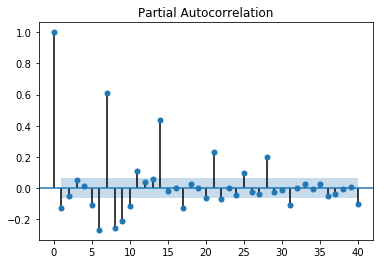

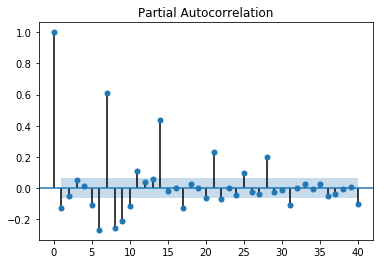

In [5]:
#plot_pacf(store1_data.Sales.diff(periods=1)[1:],lags=40)
plot_pacf(store1_data.Sales,lags=40)

We also see a larger spike at 7 (the seventh day in the week).  
If we observed a handful of random distributed spikes, a moving average model would be useful.  

/Users/zoealdington/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """Entry point for launching an IPython kernel.


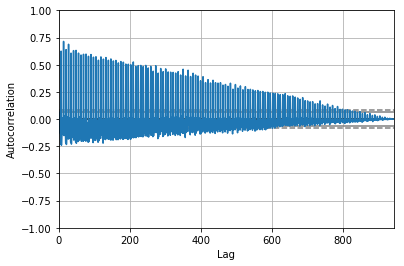

In [6]:
autocorrelation_plot(store1_data.Sales)

To explore AR, MA, and ARMA models, we will use sm.tsa.ARMA.  
Remember, an ARMA model is a combination of autoregressive and moving average models.
We can train an AR model by turning off the MA component (q=0).

By passing (1, 0) in the second argument, we are fitting an ARMA model with p=1, q=0.  This is the same as an AR(1) model.
In this AR(1) model, we learn an intercept (or base sales) value.
Additionally, we learn a coefficient that tells us how to include the latest sales value.
In this case, we add an intercept of ~4700 to 0.68 times the previous month’s sales.  Note that the coefficient is not equal to the lag 1 autocorrelation.  This implies the data is not stationary.

In [7]:
from statsmodels.tsa.arima_model import ARMA
store1_sales_data = store1_open_data[['Sales']].astype(float)
model = ARMA(store1_sales_data, (1, 0)).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  781
Model:                     ARMA(1, 0)   Log Likelihood               -6267.326
Method:                       css-mle   S.D. of innovations            739.079
Date:                Sun, 19 Nov 2017   AIC                          12540.651
Time:                        18:37:13   BIC                          12554.633
Sample:                    07-31-2015   HQIC                         12546.029
                         - 01-02-2013                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4762.6173     82.986     57.391      0.000    4599.969    4925.266
ar.L1.Sales     0.6822      0.026     26.122      0.000       0.631       0.733
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4659           +0.0000j            1.4659            0.0000
-----------------------------------------------------------------------------
"""

In [8]:
dftest = adfuller(store1_sales_data.Sales, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
dfoutput

Test Statistic                  -5.412786
p-value                          0.000003
#Lags Used                      13.000000
Number of Observations Used    767.000000
dtype: float64

In [119]:
store1_sales_data

,Sales
Date,
2015-07-31,5263.0
2015-07-30,5020.0
2015-07-29,4782.0
2015-07-28,5011.0
2015-07-27,6102.0
2015-07-25,4364.0
2015-07-24,3706.0
2015-07-23,3769.0
2015-07-22,3464.0


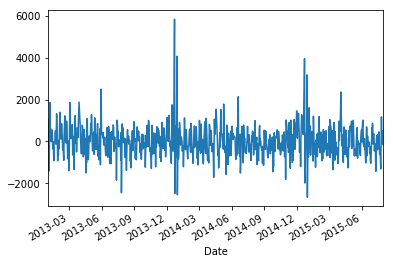

In [19]:
model.resid.plot()

We can learn an AR(2) model, which regresses each sales value on the last two.
In this case, we learn two coefficients, which tell us the effect of the last two sales values on the current sales.
While this model may perform better, it may be more difficult to interpret.

In [72]:
model = ARMA(store1_sales_data, (2, 0)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  781
Model:                     ARMA(2, 0)   Log Likelihood               -6267.032
Method:                       css-mle   S.D. of innovations            738.800
Date:                Wed, 15 Nov 2017   AIC                          12542.063
Time:                        00:17:05   BIC                          12560.705
Sample:                    07-31-2015   HQIC                         12549.233
                         - 01-02-2013                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4762.9861     85.262     55.863      0.000    4595.876    4930.096
ar.L1.Sales     0.6634      0.036     18.537      0.000       0.593       0.734
ar.L2.Sales     0.0275      0.036      0.767      0.443      -0.043       0.098
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4235           +0.0000j            1.4235            0.0000
AR.2          -25.5905           +0.0000j           25.5905            0.5000
-----------------------------------------------------------------------------
"""

Residuals are the errors of the model or how off our predictions are.
Ideally, we want randomly distributed errors that are small.
If the errors are large, our model does not perform well.
If the errors have a pattern, particularly over time, we may have overlooked something in the model or have periods of time that are different than the rest of the dataset.

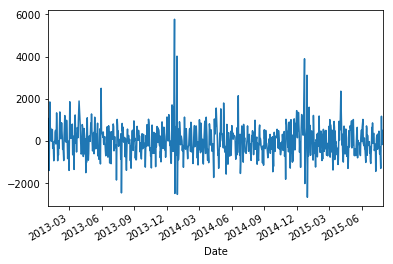

In [73]:
model.resid.plot()

Here we see large spikes at the end of each year, indicating that our model does not account for the holiday spikes.  
Our model considers a short period of time, so it does not take into account the longer seasonal pattern.

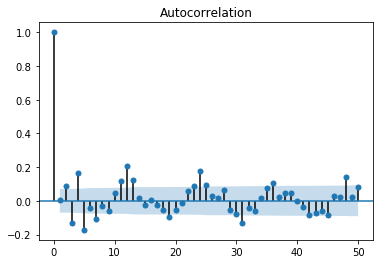

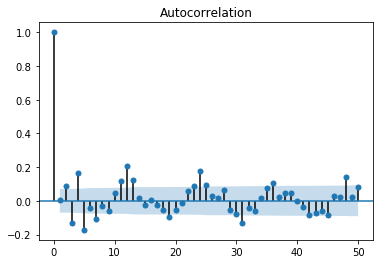

In [74]:
plot_acf(model.resid, lags=50)

We can also plot the autocorrelations of the residuals.  In an ideal world, these would all be near 0 and appear random.
This plot shows a problem:  the errors are increasing and decreasing every week in a clear pattern.
We may need to expand our model.

To expand this AR model to an ARMA model, we can include the moving average component as well.
Now we learn two coefficients, one for the AR(1) component and one for the MA(1) component.

In [75]:
model = ARMA(store1_sales_data, (1, 1)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  781
Model:                     ARMA(1, 1)   Log Likelihood               -6267.111
Method:                       css-mle   S.D. of innovations            738.876
Date:                Wed, 15 Nov 2017   AIC                          12542.222
Time:                        00:22:35   BIC                          12560.865
Sample:                    07-31-2015   HQIC                         12549.392
                         - 01-02-2013                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4762.3360     84.702     56.225      0.000    4596.323    4928.349
ar.L1.Sales     0.6979      0.035     20.095      0.000       0.630       0.766
ma.L1.Sales    -0.0294      0.045     -0.654      0.513      -0.118       0.059
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4328           +0.0000j            1.4328            0.0000
MA.1           33.9985           +0.0000j           33.9985            0.0000
-----------------------------------------------------------------------------
"""

Remember that this is an AR(1) + MA(1) model.  The AR coefficient represents dependency on the last value and the MA component represents any spikes independent of the last value.
The coefficients here are 0.69 for the AR component and -0.03 for the MA component.  
The AR coefficient is the same as before (decreasing values).
The MA component is fairly small (which we should have expected from the autocorrelation plots).

In [26]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(store1_sales_data, (1, 0, 1)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  781
Model:                     ARMA(1, 1)   Log Likelihood               -6267.111
Method:                       css-mle   S.D. of innovations            738.876
Date:                Tue, 14 Nov 2017   AIC                          12542.222
Time:                        23:45:17   BIC                          12560.865
Sample:                    07-31-2015   HQIC                         12549.392
                         - 01-02-2013                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4762.6716     84.702     56.228      0.000    4596.659    4928.685
ar.L1.Sales     0.6979      0.035     20.095      0.000       0.630       0.766
ma.L1.Sales    -0.0294      0.045     -0.654      0.514      -0.118       0.059
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4328           +0.0000j            1.4328            0.0000
MA.1           34.0023           +0.0000j           34.0023            0.0000
-----------------------------------------------------------------------------
"""

We can also fit a true ARIMA model to predict the difference of the series.
We can remove the MA component since it does not appear to be useful.
We now have an AR(1) model on the differenced series with a coefficient of -0.18.

In [39]:
model = ARIMA(store1_sales_data, (1, 1, 1)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  780
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -6261.011
Method:                       css-mle   S.D. of innovations            738.624
Date:                Tue, 14 Nov 2017   AIC                          12530.022
Time:                        23:51:27   BIC                          12548.659
Sample:                    07-30-2015   HQIC                         12537.190
                         - 01-02-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5108      0.364      1.405      0.160      -0.202       1.223
ar.L1.D.Sales     0.6801      0.026     25.801      0.000       0.628       0.732
ma.L1.D.Sales    -1.0000      0.004   -240.411      0.000      -1.008      -0.992
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4703           +0.0000j            1.4703            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [89]:
model = ARIMA(store1_sales_data.Sales, (1, 1, 0),dates=store1_sales_data.index).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  780
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -6313.616
Method:                       css-mle   S.D. of innovations            792.680
Date:                Wed, 15 Nov 2017   AIC                          12633.233
Time:                        00:38:06   BIC                          12647.211
Sample:                    07-30-2015   HQIC                         12638.609
                         - 01-02-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2161     24.028      0.009      0.993     -46.877      47.309
ar.L1.D.Sales    -0.1815      0.035     -5.150      0.000      -0.251      -0.112
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -5.5103           +0.0000j            5.5103            0.5000
-----------------------------------------------------------------------------
"""

In [90]:
 store1_sales_data.Sales.diff(1).autocorr(1)

-0.18144101447610658

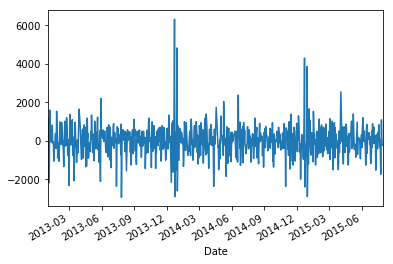

In [91]:
 store1_sales_data.Sales.diff(1).plot()

With our models, we can also plot our predictions against the true series using the plot_predict function.
We can compare the last 50 days of true values against our predictions.
The function takes two arguments, the start and end index of the dataframe to plot.  Here, we are plotting the last 50 values.

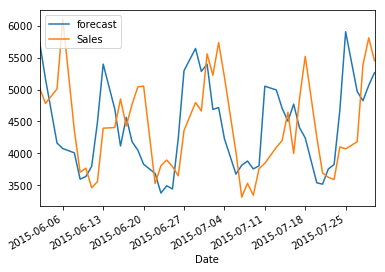

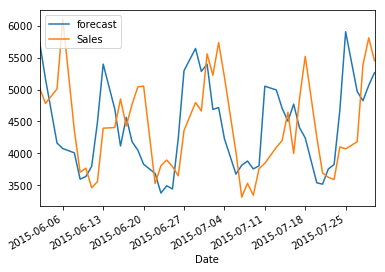

In [92]:
model.plot_predict(1,50)

To plot earlier values with our predictions continuing where the true values stop, we can do the following.
This plots true values in 2014 and our predictions 200 days out from 2014.

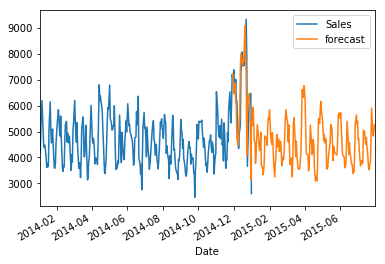

In [94]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax = store1_sales_data['2014'].Sales.plot(ax=ax)
fig = model.plot_predict(1, 200, ax=ax, plot_insample=False)

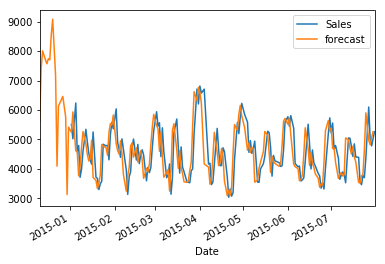

In [103]:
#model.predict(1,190).plot()
#store1_sales_data['2015'].Sales.plot()


fig, ax = plt.subplots()
ax = store1_sales_data['2015'].Sales.plot(ax=ax)
fig = model.plot_predict(1, 190, ax=ax, plot_insample=False)

In [104]:
test = model.predict(1,190) - store1_sales_data['2015'].Sales
test

Date
2014-12-11            NaN
2014-12-12            NaN
2014-12-13            NaN
2014-12-15            NaN
2014-12-16            NaN
2014-12-17            NaN
2014-12-18            NaN
2014-12-19            NaN
2014-12-20            NaN
2014-12-22            NaN
2014-12-23            NaN
2014-12-24            NaN
2014-12-27            NaN
2014-12-29            NaN
2014-12-30            NaN
2014-12-31            NaN
2015-01-02   -5288.066387
2015-01-03   -5324.907057
2015-01-05   -6198.456399
2015-01-06   -4769.741909
2015-01-07   -4744.567666
2015-01-08   -3606.675902
2015-01-09   -3862.179984
2015-01-10   -4675.328802
2015-01-12   -5415.251125
2015-01-13   -4968.388518
2015-01-14   -4565.062883
2015-01-15   -4096.206811
2015-01-16   -4439.133323
2015-01-17   -5262.185346
                 ...     
2015-06-27   -3921.109072
2015-06-29   -5289.661902
2015-06-30   -5673.949285
2015-07-01   -5384.805357
2015-07-02   -5533.789499
2015-07-03   -4744.232464
2015-07-04   -4925.413242
2015-07

In [68]:
#store1_sales_data['2015'].Sales
model.predict(1,175)

Date
2015-07-30     -2.971086
2015-07-29   -570.487680
2015-07-28   -497.067406
2015-07-27   -367.703931
2015-07-25    128.931989
2015-07-24   -748.129624
2015-07-23   -970.691236
2015-07-22   -686.636058
2015-07-21   -457.938640
2015-07-20   -478.132849
2015-07-18   -387.573207
2015-07-17   -414.873576
2015-07-16   -469.462476
2015-07-15   -251.313538
2015-07-14    243.377559
2015-07-13    281.132618
2015-07-11    302.223464
2015-07-10    428.546709
2015-07-09    273.654137
2015-07-08    -66.147050
2015-07-07    -69.787750
2015-07-06   -273.336037
2015-07-04   -119.888820
2015-07-03   -119.465306
2015-07-02   -350.858922
2015-07-01   -257.748622
2015-06-30   -282.848093
2015-06-29     -0.504127
2015-06-27    211.483644
2015-06-26     76.151507
                 ...    
2015-02-04    108.646042
2015-02-03    182.006178
2015-02-02    230.533322
2015-01-31     78.435617
2015-01-30     36.989829
2015-01-29   -225.971661
2015-01-28     93.464945
2015-01-27   -109.802273
2015-01-26   -219.44

We can adjust the AR component of the model to adjust for a piece of this.  Let’s increase the lag to 7.
This removes some of the autocorrelation in the residuals but large discrepancies still exist.
However, they exist where we are breaking our model assumptions.

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  780
Model:                 ARIMA(7, 1, 2)   Log Likelihood               -6221.636
Method:                       css-mle   S.D. of innovations            703.783
Date:                Wed, 15 Nov 2017   AIC                          12465.272
Time:                        00:53:15   BIC                          12516.524
Sample:                    07-30-2015   HQIC                         12484.984
                         - 01-02-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.6863      4.555      0.151      0.880      -8.241       9.614
ar.L1.D.Sales     0.8404      0.211      3.982      0.000       0.427       1.254
ar.L2.D.Sales    -0.1503      0.145     -1.038      0.300      -0.434       0.134
ar.L3.D.Sales    -0.1831      0.046     -3.976      0.000      -0.273      -0.093
ar.L4.D.Sales     0.2557      0.060      4.296      0.000       0.139       0.372
ar.L5.D.Sales    -0.3381      0.067     -5.018      0.000      -0.470      -0.206
ar.L6.D.Sales     0.0691      0.074      0.931      0.352      -0.076       0.215
ar.L7.D.Sales    -0.0656      0.050     -1.325      0.185      -0.163       0.031
ma.L1.D.Sales    -1.1350      0.209     -5.443      0.000      -1.544      -0.726
ma.L2.D.Sales     0.2373      0.197      1.203      0.229      -0.149       0.624
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.2128           -0.0000j            1.2128           -0.5000
AR.2            1.0141           -0.4950j            1.1285           -0.0723
AR.3            1.0141           +0.4950j            1.1285            0.0723
AR.4           -0.1357           -1.7545j            1.7597           -0.2623
AR.5           -0.1357           +1.7545j            1.7597            0.2623
AR.6            0.2547           -1.7666j            1.7848           -0.2272
AR.7            0.2547           +1.7666j            1.7848            0.2272
MA.1            1.1647           +0.0000j            1.1647            0.0000
MA.2            3.6180           +0.0000j            3.6180            0.0000
-----------------------------------------------------------------------------
"""

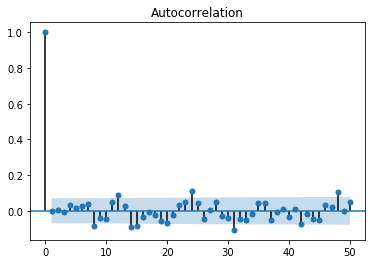

In [111]:
model = ARIMA(store1_sales_data, (7, 1, 2)).fit()
plot_acf(model.resid, lags=50)
model.summary()

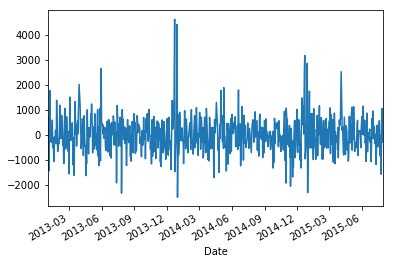

In [112]:
model.resid.plot()

In [143]:
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=30)
    rolstd = pd.rolling_std(timeseries, window=30)

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

C:\Users\Ayham\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).mean()
C:\Users\Ayham\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).std()


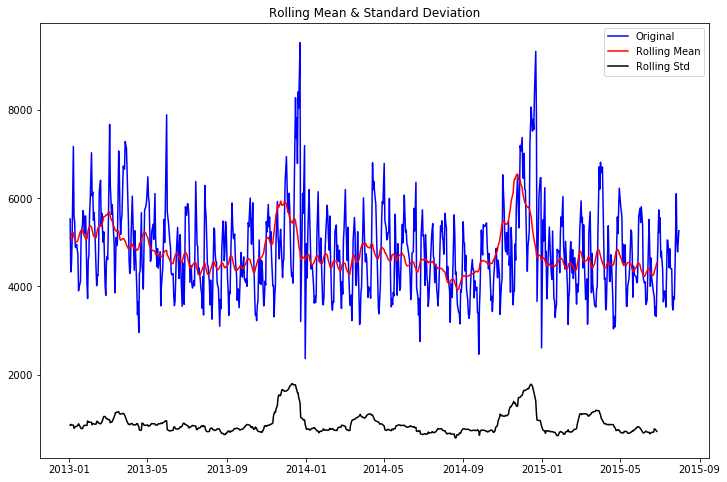

Results of Dickey-Fuller Test:
Test Statistic                  -5.412786
p-value                          0.000003
#Lags Used                      13.000000
Number of Observations Used    767.000000
Critical Value (1%)             -3.438905
Critical Value (5%)             -2.865316
Critical Value (10%)            -2.568781
dtype: float64


In [144]:
test_stationarity(store1_sales_data.Sales)

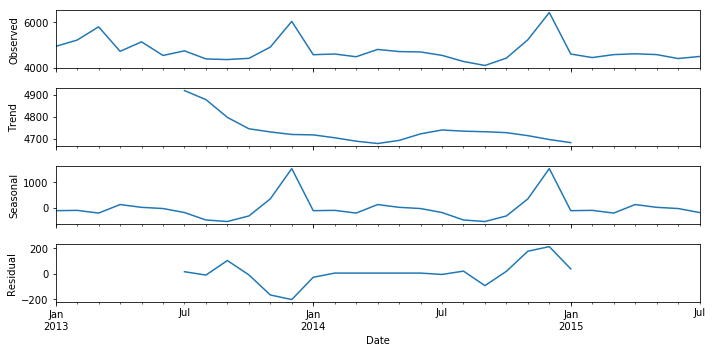

In [172]:
import statsmodels.api as sm

#res = sm.tsa.seasonal_decompose(store1_sales_data.Sales.resample('M').mean(),freq =12)
res = sm.tsa.seasonal_decompose(store1_sales_data.Sales.resample('M').mean(),freq =12)

fig = res.plot()
fig.set_size_inches(10, 5)
plt.tight_layout()

### Walmart Sales Data

For the independent practice, we will analyze the weekly sales data from Walmart over a two year period from 2010 to 2012.

The data is again separated by store and by department, but we will focus on analyzing one store for simplicity.

The data includes:

- Store - the store number
- Dept - the department number
- Date - the week
- Weekly_Sales -  sales for the given department in the given store
- IsHoliday - whether the week is a special holiday week


#### Loading the data and setting the DateTimeIndex

In [165]:
data = pd.read_csv('../../assets/dataset/train.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data.head()

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-05,1,1,24924.50,False
2010-02-12,1,1,46039.49,True
2010-02-19,1,1,41595.55,False
2010-02-26,1,1,19403.54,False
2010-03-05,1,1,21827.90,False


#### Filter the dataframe to Store 1 sales and aggregate over departments to compute the total sales per store.

In [166]:
# Filter to store 1 sales and average over weeks
store1_sales = data[data.Store == 1][['Weekly_Sales']].resample('W', 'sum')
store1_sales.head()

C:\Users\Ayham\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  from ipykernel import kernelapp as app


,Weekly_Sales
Date,
2010-02-07,1643690.90
2010-02-14,1641957.44
2010-02-21,1611968.17
2010-02-28,1409727.59
2010-03-07,1554806.68


#### Plot the rolling_mean for `Weekly_Sales`. What general trends do you observe?

C:\Users\Ayham\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=3,center=False).mean()
  if __name__ == '__main__':


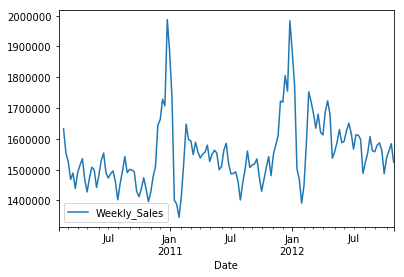

In [167]:
pd.rolling_mean(store1_sales[['Weekly_Sales']], 3).plot()

#### Compute the 1, 2, 52 autocorrelations for `Weekly_Sales` and/or create an autocorrelation plot.

In [168]:
print('Autocorrelation 1: ', store1_sales['Weekly_Sales'].autocorr(1))
print('Autocorrelation 3: ', store1_sales['Weekly_Sales'].autocorr(3))
print('Autocorrelation 52: ', store1_sales['Weekly_Sales'].autocorr(52))

Autocorrelation 1:  0.302158279411
Autocorrelation 3:  0.0597992350667
Autocorrelation 52:  0.895376029478


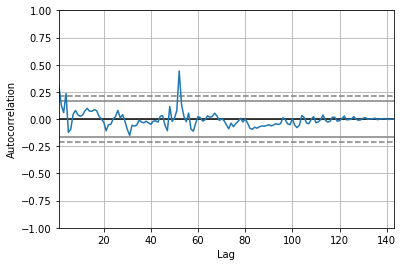

In [169]:
from pandas.tools.plotting import autocorrelation_plot

autocorrelation_plot(store1_sales['Weekly_Sales'])

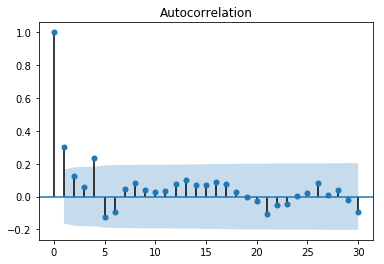

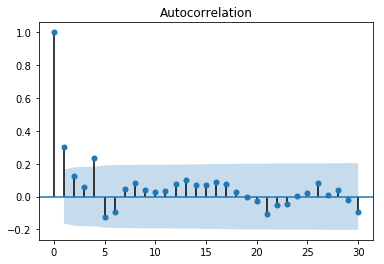

In [170]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(store1_sales['Weekly_Sales'], lags=30)

# Components 1 and 2 seem particularly useful for autoregression, perhaps up to 4
# In the plot above notice, spike at around 52 - implying a yearly pattern as well
# No random spikes, probably not much use for a moving average model

#### Split the weekly sales data in a training and test set - using 75% of the data for training

In [11]:
n = len(store1_sales.Weekly_Sales)

train = store1_sales.Weekly_Sales[:int(.75*n)]
test = store1_sales.Weekly_Sales[int(.75*n):]

#### Create an AR(1) model on the training data and compute the mean absolute error of the predictions.

In [12]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error

In [13]:
model = sm.tsa.ARIMA(train, (1, 0, 0)).fit()

predictions = model.predict(
    '2012-02-27',
    '2012-10-29',
    dynamic=True, 
)

print("Mean absolute error: ", mean_absolute_error(test, predictions))
model.summary()

('Mean absolute error: ', 81839.338629691949)


/Users/arahuja/anaconda/lib/python2.7/site-packages/statsmodels/base/data.py:503: FutureWarning: TimeSeries is deprecated. Please use Series
  return TimeSeries(result, index=self.predict_dates)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           Weekly_Sales   No. Observations:                  107
Model:                     ARMA(1, 0)   Log Likelihood               -1434.663
Method:                       css-mle   S.D. of innovations         160916.939
Date:                Tue, 08 Mar 2016   AIC                           2875.327
Time:                        12:48:18   BIC                           2883.345
Sample:                    02-07-2010   HQIC                          2878.577
                         - 02-19-2012                                         
======================================================================================
                         coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
const               1.544e+06   2.26e+04     68.293      0.000       1.5e+06  1.59e+06
ar.L1.Weekly_Sales     0.3147      0.093      3.399      0.001         0.133     0.496
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            3.1779           +0.0000j            3.1779            0.0000
-----------------------------------------------------------------------------
"""

#### Plot the residuals - where are their significant errors.

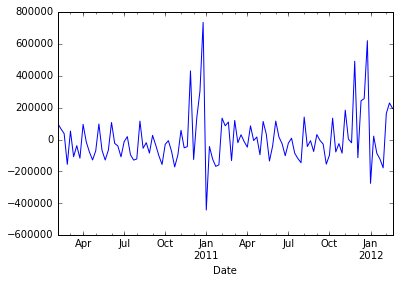

In [14]:
model.resid.plot()

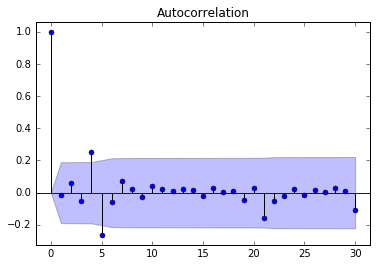

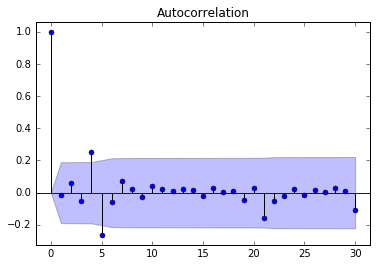

In [15]:
plot_acf(model.resid, lags=30)

#### Compute and AR(2) model and an ARMA(2, 2) model - does this improve your mean absolute error on the held out set.

In [16]:
model = sm.tsa.ARIMA(train, (2, 0, 0)).fit()

predictions = model.predict(
    '2012-02-27',
    '2012-10-29',
    dynamic=True, 
)

print("Mean absolute error: ", mean_absolute_error(test, predictions))
model.summary()

('Mean absolute error: ', 81203.240909485947)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           Weekly_Sales   No. Observations:                  107
Model:                     ARMA(2, 0)   Log Likelihood               -1434.482
Method:                       css-mle   S.D. of innovations         160638.038
Date:                Tue, 08 Mar 2016   AIC                           2876.963
Time:                        12:48:22   BIC                           2887.655
Sample:                    02-07-2010   HQIC                          2881.298
                         - 02-19-2012                                         
======================================================================================
                         coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
const               1.544e+06    2.4e+04     64.349      0.000       1.5e+06  1.59e+06
ar.L1.Weekly_Sales     0.2974      0.097      3.075      0.003         0.108     0.487
ar.L2.Weekly_Sales     0.0589      0.098      0.603      0.548        -0.132     0.250
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3081           +0.0000j            2.3081            0.0000
AR.2           -7.3588           +0.0000j            7.3588            0.5000
-----------------------------------------------------------------------------
"""

In [17]:
model = sm.tsa.ARIMA(train, (2, 0, 2)).fit()

predictions = model.predict(
    '2012-02-27',
    '2012-10-29',
    dynamic=True, 
)

print("Mean absolute error: ", mean_absolute_error(test, predictions))
model.summary()

('Mean absolute error: ', 80502.745386798299)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           Weekly_Sales   No. Observations:                  107
Model:                     ARMA(2, 2)   Log Likelihood               -1425.781
Method:                       css-mle   S.D. of innovations         144113.350
Date:                Tue, 08 Mar 2016   AIC                           2863.563
Time:                        12:48:23   BIC                           2879.600
Sample:                    02-07-2010   HQIC                          2870.064
                         - 02-19-2012                                         
======================================================================================
                         coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
const               1.544e+06   1.92e+04     80.327      0.000      1.51e+06  1.58e+06
ar.L1.Weekly_Sales    -1.0400      0.090    -11.583      0.000        -1.216    -0.864
ar.L2.Weekly_Sales    -0.4701      0.087     -5.381      0.000        -0.641    -0.299
ma.L1.Weekly_Sales     1.4692      0.058     25.424      0.000         1.356     1.582
ma.L2.Weekly_Sales     0.9998      0.074     13.576      0.000         0.855     1.144
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1060           -0.9507j            1.4584           -0.3870
AR.2           -1.1060           +0.9507j            1.4584            0.3870
MA.1           -0.7347           -0.6785j            1.0001           -0.3813
MA.2           -0.7347           +0.6785j            1.0001            0.3813
-----------------------------------------------------------------------------
"""

#### Finally, compute an ARIMA model to improve your prediction error - iterate on the p, q, and parameters comparing the model's performance.

In [18]:
model = sm.tsa.ARIMA(train, (2, 1, 3)).fit()

predictions = model.predict(
    '2012-02-27',
    '2012-10-29',
    dynamic=False, 
    typ='levels'
)

print("Mean absolute error: ", mean_absolute_error(test, predictions))
model.summary()

('Mean absolute error: ', 77789.494825392394)


/Users/arahuja/anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.Weekly_Sales   No. Observations:                  106
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -1413.622
Method:                       css-mle   S.D. of innovations         142943.992
Date:                Tue, 08 Mar 2016   AIC                           2841.243
Time:                        12:48:27   BIC                           2859.887
Sample:                    02-14-2010   HQIC                          2848.800
                         - 02-19-2012                                         
========================================================================================
                           coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
const                  577.5354    622.025      0.928      0.355      -641.611  1796.682
ar.L1.D.Weekly_Sales    -1.0481      0.090    -11.609      0.000        -1.225    -0.871
ar.L2.D.Weekly_Sales    -0.4778      0.088     -5.442      0.000        -0.650    -0.306
ma.L1.D.Weekly_Sales     0.4694      0.116      4.057      0.000         0.243     0.696
ma.L2.D.Weekly_Sales    -0.4693      0.152     -3.095      0.003        -0.766    -0.172
ma.L3.D.Weekly_Sales    -0.9997      0.123     -8.098      0.000        -1.242    -0.758
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0967           -0.9434j            1.4466           -0.3869
AR.2           -1.0967           +0.9434j            1.4466            0.3869
MA.1            1.0001           -0.0000j            1.0001           -0.0000
MA.2           -0.7348           -0.6784j            1.0001           -0.3813
MA.3           -0.7348           +0.6784j            1.0001            0.3813
-----------------------------------------------------------------------------
"""